### Importacion de las Librerías

In [ ]:
import sys
import os
import shutil
from pathlib import Path
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gradio as gr



print("Python:", sys.version)
print("scikit-learn:", sklearn.__version__)
print("TensorFlow:", tf.__version__)
print("Gradio:", gr.__version__)
print("NumPy:", np.__version__)
print("Seaborn:", sns.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Pandas:", pd.__version__)
print("Pillow:", Image.__version__)


Python: 3.11.14 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 18:30:03) [MSC v.1929 64 bit (AMD64)]
scikit-learn: 1.8.0
TensorFlow: 2.20.0
Gradio: 6.1.0
NumPy: 2.3.5
Seaborn: 0.13.2
Matplotlib: 3.10.8
Pandas: 2.3.3
Pillow: 12.0.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Traceback (most recent call last):
  File "c:\Users\felip\Miniconda3\envs\MLDSM6\Lib\site-packages\gradio\queueing.py", line 763, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\felip\Miniconda3\envs\MLDSM6\Lib\site-packages\gradio\route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\felip\Miniconda3\envs\MLDSM6\Lib\site-packages\gradio\blocks.py", line 2125, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\felip\Miniconda3\envs\MLDSM6\Lib\site-packages\gradio\blocks.py", line 1607, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\felip\Miniconda3\envs\MLDSM6\Lib\site-packages\anyio\to_thread.py", line 61, in run_sync


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Traceback (most recent call last):
  File "c:\Users\felip\Miniconda3\envs\MLDSM6\Lib\site-packages\gradio\queueing.py", line 763, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\felip\Miniconda3\envs\MLDSM6\Lib\site-packages\gradio\route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\felip\Miniconda3\envs\MLDSM6\Lib\site-packages\gradio\blocks.py", line 2125, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\felip\Miniconda3\envs\MLDSM6\Lib\site-packages\gradio\blocks.py", line 1607, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\felip\Miniconda3\envs\MLDSM6\Lib\site-packages\anyio\to_thread.py", line 61, in run_sync


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Created dataset file at: .gradio\flagged\dataset1.csv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


### Análisis exploratorio

Razas Etiquetadas en el Dataset

In [49]:
cat_breeds = [
    'Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair',
    'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue',
    'Siamese', 'Sphynx'
]

Clasificacion de las imágenes

In [50]:
images_path = Path("data/raw/images")
all_images = list(images_path.glob("*.jpg"))

print(f"Total de imágenes encontradas: {len(all_images)}")

cats = []
not_cats = []

for img_path in all_images:
    breed = "_".join(img_path.stem.split("_")[:-1])
    if breed in cat_breeds:
        cats.append(img_path)
    else:
        not_cats.append(img_path)

print(f"Gatos: {len(cats)}")
print(f"No gatos: {len(not_cats)}")

Total de imágenes encontradas: 7390
Gatos: 2400
No gatos: 4990


Conteo de imágenes por razas

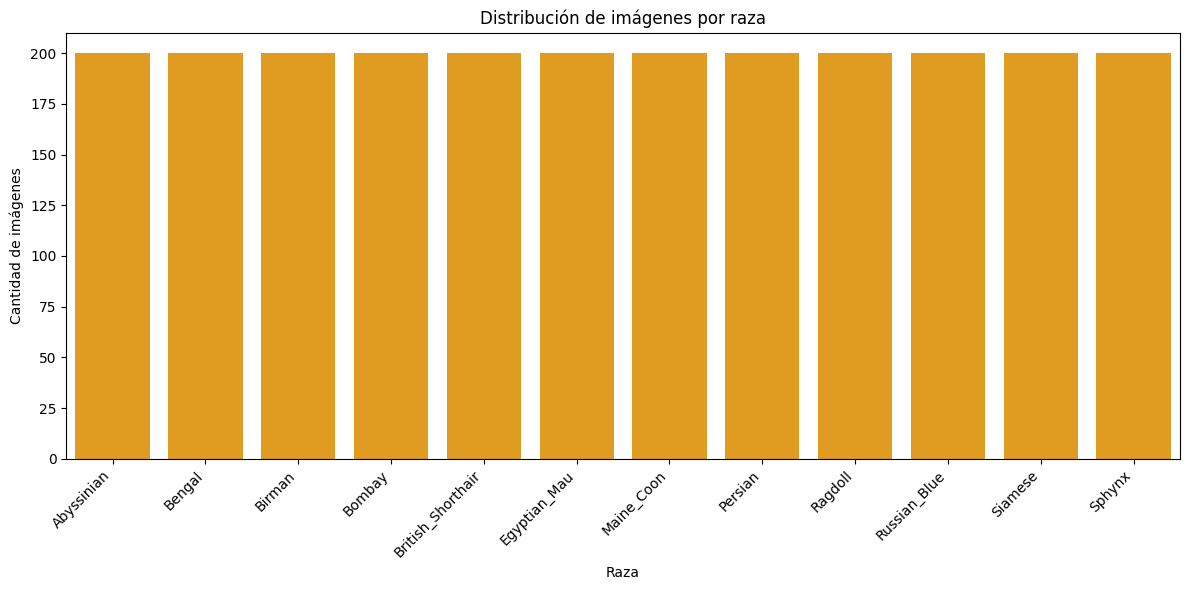

In [51]:
# Extraer la raza desde el nombre del archivo
breeds = [
    "_".join(p.stem.split("_")[:-1])
    for p in all_images
    if "_".join(p.stem.split("_")[:-1]) in cat_breeds
]

df_counts = pd.DataFrame(breeds, columns=["breed"])


df_counts = pd.DataFrame(breeds, columns=["breeds"])
plt.figure(figsize=(12,6))
sns.countplot(data=df_counts,x="breeds",order=df_counts["breeds"].value_counts().index,color='orange')
plt.xticks(rotation=45, ha="right")
plt.title("Distribución de imágenes por raza")
plt.xlabel("Raza")
plt.ylabel("Cantidad de imágenes")
plt.tight_layout()
plt.show()


Promedio de tamaño por imagen

In [52]:
widths = []
heights = []

for img_path in all_images[:2000]:
    try:
        with Image.open(img_path) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)
    except:
        pass

print("Ancho promedio:", np.mean(widths))
print("Alto promedio:", np.mean(heights))


Ancho promedio: 438.504
Alto promedio: 382.6375


Imagen de muestra

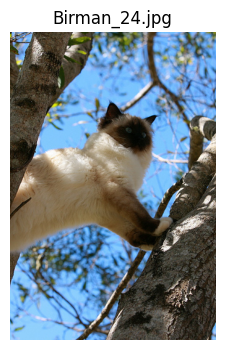

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [ ]:
cat_images = [
    p for p in all_images
    if "_".join(p.stem.split("_")[:-1]) in cat_breeds
]
img_path = random.choice(cat_images)
img = Image.open(img_path)

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis("off")
plt.title(img_path.name)
plt.show()

### Preprocesado

Particion de la data en entrenamiento y evaluación

In [54]:
cats_train, cats_val = train_test_split(cats, test_size=0.2, random_state=42)
not_cats_train, not_cats_val = train_test_split(not_cats, test_size=0.2, random_state=42)


In [55]:
def safe_copy_list_to_folder(file_list, dest_folder):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    else:
        # Vaciar carpeta para evitar duplicados
        for filename in os.listdir(dest_folder):
            file_path = os.path.join(dest_folder, filename)
            if os.path.isfile(file_path):
                os.remove(file_path)
    for f in file_list:
        shutil.copy(str(f), dest_folder)


print("Copiando imágenes...")

safe_copy_list_to_folder(cats_train, "data/processed/train/cat")
safe_copy_list_to_folder(cats_val, "data/processed/val/cat")
safe_copy_list_to_folder(not_cats_train, "data/processed/train/not_cat")
safe_copy_list_to_folder(not_cats_val, "data/processed/val/not_cat")

print("Copia completada.")
print(f"Train -> Gatos: {len(cats_train)}, No gatos: {len(not_cats_train)}")
print(f"Val   -> Gatos: {len(cats_val)}, No gatos: {len(not_cats_val)}")

Copiando imágenes...
Copia completada.
Train -> Gatos: 1920, No gatos: 3992
Val   -> Gatos: 480, No gatos: 998


Carga, normalización y generación de imágenes

In [56]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "data/processed/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    classes=["not_cat", "cat"]
)

val_generator = val_datagen.flow_from_directory(
    "data/processed/val",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    classes=["not_cat", "cat"]
)


Found 5912 images belonging to 2 classes.
Found 1478 images belonging to 2 classes.


### Modelado

Declaración del Modelo Transfer Learning

In [57]:
def create_transfer_learning_model():
    base = tf.keras.applications.MobileNetV2(
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
        include_top=False,
        weights="imagenet"
    )
    base.trainable = False

    model = models.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

model = create_transfer_learning_model()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Entrenamiento

In [58]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2)
    ]
)



Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 180s 954ms/step - accuracy: 0.9479 - loss: 0.1564 - val_accuracy: 0.9892 - val_loss: 0.0587 - learning_rate: 0.0010
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 172s 929ms/step - accuracy: 0.9755 - loss: 0.0776 - val_accuracy: 0.9912 - val_loss: 0.0392 - learning_rate: 0.0010
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 178s 961ms/step - accuracy: 0.9812 - loss: 0.0624 - val_accuracy: 0.9912 - val_loss: 0.0341 - learning_rate: 0.0010
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 178s 961ms/step - accuracy: 0.9821 - loss: 0.0512 - val_accuracy: 0.9926 - val_loss: 0.0313 - learning_rate: 0.0010
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 177s 958ms/step - accuracy: 0.9799 - loss: 0.0557 - val_accuracy: 0.9912 - val_loss: 0.0286 - learning_rate: 0.0010
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 178s 961ms/step - accuracy: 0.9822 - loss: 0.0492 - val_accuracy: 0.9905 - val_loss: 0.0286 - learning_rate: 0.0010
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 168s 906ms/step - accura

Guardado del modelo

In [59]:
model.save("model/cat_classifier.keras")
model.save("model/cat_classifier.h5")
model.export("model/cat_classifier_savedmodel")
print("Modelos guardados.")


INFO:tensorflow:Assets written to: model/cat_classifier_savedmodel\assets


INFO:tensorflow:Assets written to: model/cat_classifier_savedmodel\assets


Saved artifact at 'model/cat_classifier_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_319')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1356456671952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1356456151568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1356456151952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1356456152336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1356455293584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1356455285328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1356454700112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1356357853712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1356454699536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1356456151376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1356456670032: 

### Evaluación del Modelo

In [60]:
val_generator.reset()

y_true = val_generator.classes
y_prob = model.predict(val_generator).ravel()
y_pred = (y_prob >= 0.5).astype(int)

47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 621ms/step


Matriz de Confusión

In [61]:
cm = confusion_matrix(y_true, y_pred)

print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[660 338]
 [338 142]]


Reporte de clasificación

In [62]:
print(classification_report(
    y_true,
    y_pred,
    target_names=["not_cat", "cat"]
))

              precision    recall  f1-score   support

     not_cat       0.66      0.66      0.66       998
         cat       0.30      0.30      0.30       480

    accuracy                           0.54      1478
   macro avg       0.48      0.48      0.48      1478
weighted avg       0.54      0.54      0.54      1478



AUC

In [63]:
auc = roc_auc_score(y_true, y_prob)
print(f"AUC-ROC: {auc:.4f}")

AUC-ROC: 0.4766


Curva ROC

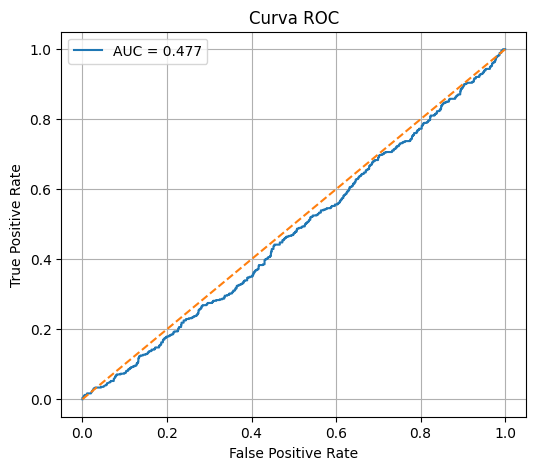

In [64]:
fpr, tpr, _ = roc_curve(y_true, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()


### Resultados

Interfaz Gráfica

In [ ]:
model = tf.keras.models.load_model("model/cat_classifier.keras")

def predict_cat(image):
    img = image.resize((224, 224))
    arr = np.array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)

    p = model.predict(arr)[0][0]

    if p > 0.5:
        return f" Es un GATO (Confianza: {p*100:.2f}%)"
    else:
        return f"No es un GATO (Confianza: {(1-p)*100:.2f}%)"

gr.Interface(
    fn=predict_cat,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Clasificador de Gatos",
    description="Sube una imagen para identificar si contiene un gato."
).launch(share=True)

* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://49fd80bd4bf030e58f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
